In [1]:
import numpy as np 
import pandas as pd 

df=pd.read_csv('/kaggle/input/input-data/Stress-Lysis.csv')

In [2]:
df.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [3]:
df.describe()

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [5]:
df.isna().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

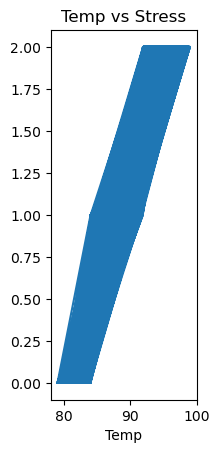

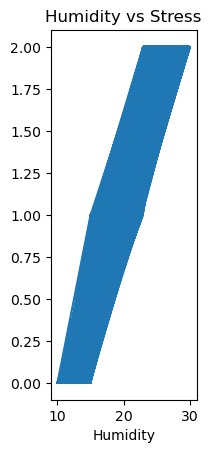

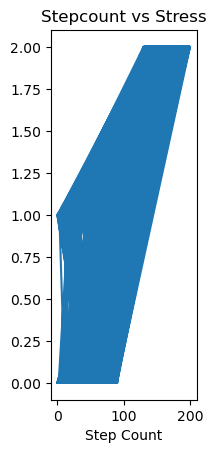

In [7]:
plt.subplot(1,3,1)
plt.plot(df.Temperature,df.Stress_Level)
plt.xlabel('Temp')
plt.title('Temp vs Stress')
plt.show()
plt.subplot(1,3,2)
plt.plot(df.Humidity,df.Stress_Level)
plt.title('Humidity vs Stress')
plt.xlabel('Humidity')
plt.show()
plt.subplot(1,3,3)
plt.plot(df.Step_count,df.Stress_Level)
plt.title('Stepcount vs Stress')
plt.xlabel('Step Count')
plt.show()

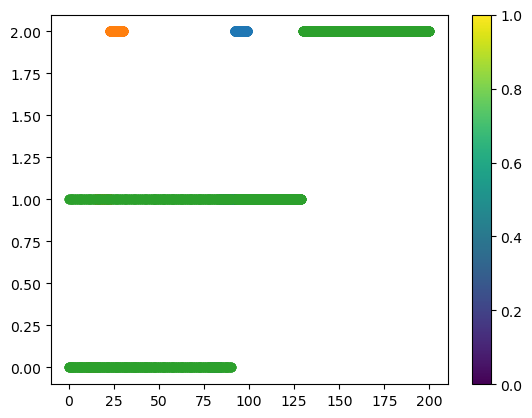

In [8]:

plt.scatter(df.Temperature,df.Stress_Level,cmap='viridis')



plt.scatter(df.Humidity,df.Stress_Level,cmap='viridis')



plt.scatter(df.Step_count,df.Stress_Level,cmap='viridis')
plt.colorbar()

plt.show()

Text(0.5, 0, 'Stress Level')

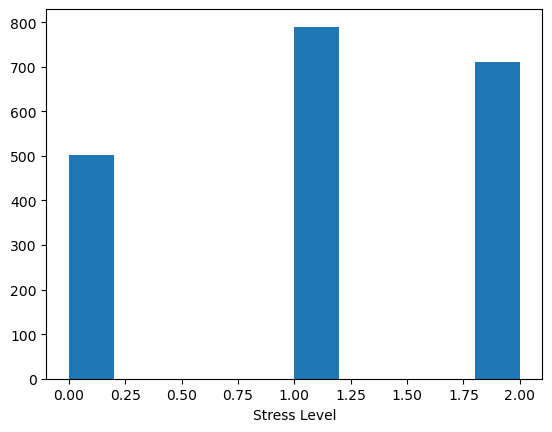

In [9]:
plt.hist(df.Stress_Level)

plt.xlabel('Stress Level')
# print(plt.xlabel)
# plt.show()

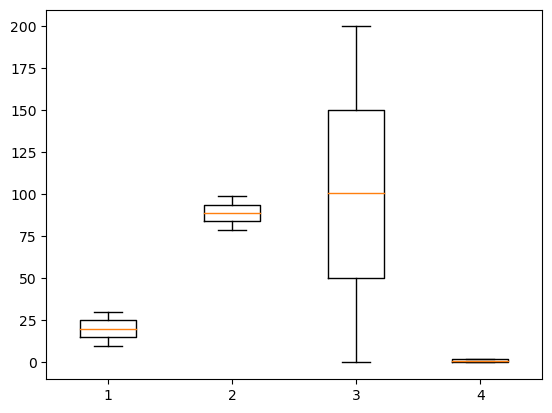

In [11]:
plt.boxplot(df)
plt.show()

In [13]:
cor=df.corr()
cor

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step_count,0.870486,0.870486,1.000000,0.832623
Stress_Level,0.936036,0.936036,0.832623,1.000000


In [16]:
import seaborn as sns

<AxesSubplot:>

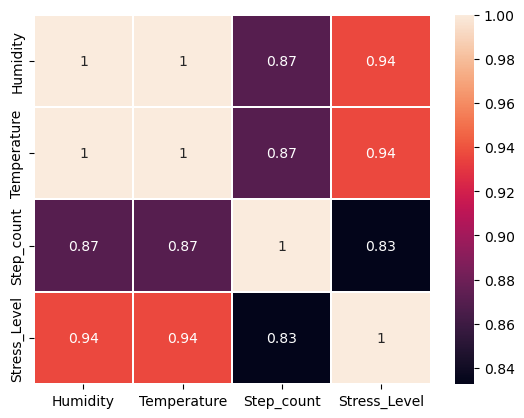

In [20]:
sns.heatmap(cor,annot=True,linewidths=0.1)

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
x=df.drop('Stress_Level',axis=1)
y=df.Stress_Level
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)

***Decision Tree***

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(dt_pred,y_test)

1.0

In [29]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, dt_pred) 
cm

array([[103,   0,   0],
       [  0, 152,   0],
       [  0,   0, 146]])

In [35]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
svc_pred=model.predict(x_test)
accuracy_score(svc_pred,y_test)

1.0

In [36]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 
nav_pred=classifier.predict(x_test)
accuracy_score(nav_pred,y_test)

0.9850374064837906

***Random Forest***

In [37]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier()  
classifier.fit(x_train, y_train)  
ran_pred=classifier.predict(x_test)
accuracy_score(ran_pred,y_test)

1.0